<a href="https://colab.research.google.com/github/leynessa/Deeplearning_cv-/blob/main/Makeup_Segmentationproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data
!mkdir data/train data/val data/test

In [ ]:
import shutil
import random
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
import numpy as np # for working with arrays
import pandas as pd # for doing a bit of data science
from skimage.io import imread # to load images from files
import matplotlib.pyplot as plt # for ugly visualisations
import seaborn as sns # for nice visualisations

In [ ]:
def take_photos(interval=5, quality=0.8, number_of_photos=5, file_prefix='photo'):
    """
    Captures photos from the webcam at specified intervals.

    :param interval: Time between photos in seconds.
    :param quality: Quality of the captured photos (0 to 1).
    :param number_of_photos: The total number of photos to take.
    :param file_prefix: Prefix to save the photos with.
    """
    js = Javascript('''
    async function takePhotos(interval, quality, number_of_photos) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Start Capturing';
        capture.style.backgroundColor = '#008CBA';
        div.appendChild(capture);

        const statusText = document.createElement('p');
        statusText.textContent = 'Ready to capture.';
        div.appendChild(statusText);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        let photos = [];
        await new Promise((resolve) => {
            capture.onclick = () => {
                capture.style.backgroundColor = '#4CAF50';
                capture.textContent = 'Capturing...';
                let captures = 0;
                const intervalId = setInterval(async () => {
                    if (captures >= number_of_photos) {
                        clearInterval(intervalId);
                        resolve();
                        return;
                    }
                    captures++;
                    statusText.textContent = captures + ' photos taken...';
                    const canvas = document.createElement('canvas');
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    canvas.getContext('2d').drawImage(video, 0, 0);
                    photos.push(canvas.toDataURL('image/jpeg', quality));
                }, interval * 1000);
            };
        });

        stream.getVideoTracks()[0].stop();
        div.remove();
        return photos;
    }
    ''')
    display(js)
    photos_data_urls = eval_js(f'takePhotos({interval}, {quality}, {number_of_photos})')

    filenames = []
    for index, data in enumerate(photos_data_urls):
        filename = f'{file_prefix}_{index}.jpg'
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        filenames.append(filename)

    return filenames

<font color='red'> Test the above function to see that your camera works. </font>

In [ ]:
test_filenames = take_photos(interval = 0.15, quality = 0.8, number_of_photos = 2, file_prefix='photo')

<IPython.core.display.Javascript object>

<font color='red'> Check that you can see two photos appeared in the root of your user Files. </font>

In [ ]:
!ls

data  photo_0.jpg  photo_1.jpg	sample_data


In [ ]:

first_class_name = "brush"
second_class_name = "lipstick"

num_photos_per_class = 50 # at least 50 would be fine


In [ ]:
first_class_filenames = take_photos(interval = 8.0, quality = 0.8, number_of_photos = num_photos_per_class, file_prefix='data/train/' + first_class_name)

<IPython.core.display.Javascript object>

In [ ]:
second_class_filenames = take_photos(interval = 5.5, quality = 0.8, number_of_photos = num_photos_per_class, file_prefix='data/train/' + second_class_name)

<IPython.core.display.Javascript object>

In [ ]:
len(first_class_filenames)

50

In [ ]:
len(second_class_filenames)

50

In [ ]:
import shutil
from google.colab import files
folder_to_zip = "/content/data/train"
output_zip = "/content/makeup_dataset.zip"
# Create a ZIP file
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', folder_to_zip)

# Download the ZIP file
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

val_size_per_class = 10


In [ ]:



train_folder = 'data/train'
val_folder = 'data/val'
os.makedirs(val_folder, exist_ok=True)

for class_name in [first_class_name, second_class_name]:
    class_files = [f for f in os.listdir(train_folder) if f.startswith(class_name)]


    for _ in range(val_size_per_class):
        if class_files:
            val_fname = random.choice(class_files)
            shutil.move(os.path.join(train_folder, val_fname), os.path.join(val_folder, val_fname))
            class_files.remove(val_fname)  # Remove the moved file from the list
        else:
            print(f"No files found for {class_name} in {train_folder} to move.")
     # you can use shutil.move to move some images from train folder to val


In [ ]:
!ls ./data/val/ | wc -l

20


In [ ]:
! zip -r data.zip data

  adding: data/ (stored 0%)
  adding: data/val/ (stored 0%)
  adding: data/val/lipstick_34.jpg (deflated 2%)
  adding: data/val/lipstick_28.jpg (deflated 2%)
  adding: data/val/lipstick_39.jpg (deflated 2%)
  adding: data/val/lipstick_18.jpg (deflated 2%)
  adding: data/val/brush_4.jpg (deflated 2%)
  adding: data/val/lipstick_16.jpg (deflated 3%)
  adding: data/val/brush_44.jpg (deflated 2%)
  adding: data/val/lipstick_14.jpg (deflated 2%)
  adding: data/val/brush_28.jpg (deflated 3%)
  adding: data/val/lipstick_13.jpg (deflated 2%)
  adding: data/val/brush_26.jpg (deflated 2%)
  adding: data/val/brush_15.jpg (deflated 3%)
  adding: data/val/brush_22.jpg (deflated 2%)
  adding: data/val/brush_7.jpg (deflated 2%)
  adding: data/val/brush_2.jpg (deflated 2%)
  adding: data/val/lipstick_49.jpg (deflated 2%)
  adding: data/val/brush_25.jpg (deflated 3%)
  adding: data/val/lipstick_6.jpg (deflated 2%)
  adding: data/val/lipstick_42.jpg (deflated 2%)
  adding: data/val/brush_3.jpg (deflated

In [ ]:
from google.colab import files
files.download('data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
_ = files.upload()

Saving data.zip to data (1).zip


In [ ]:
!unzip data.zip

Archive:  data.zip
replace data/val/lipstick_34.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/val/lipstick_34.jpg  
replace data/val/lipstick_28.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/val/lipstick_28.jpg  
  inflating: data/val/lipstick_39.jpg  
  inflating: data/val/lipstick_18.jpg  
  inflating: data/val/brush_4.jpg    
  inflating: data/val/lipstick_16.jpg  
  inflating: data/val/brush_44.jpg   
  inflating: data/val/lipstick_14.jpg  
  inflating: data/val/brush_28.jpg   
  inflating: data/val/lipstick_13.jpg  
  inflating: data/val/brush_26.jpg   
  inflating: data/val/brush_15.jpg   
  inflating: data/val/brush_22.jpg   
  inflating: data/val/brush_7.jpg    
  inflating: data/val/brush_2.jpg    
  inflating: data/val/lipstick_49.jpg  
  inflating: data/val/brush_25.jpg   
  inflating: data/val/lipstick_6.jpg  
  inflating: data/val/lipstick_42.jpg  
  inflating: data/val/brush_3.jpg    
  inflating: data/train/lipstick_44.jpg  
  inflating:

In [ ]:
# Read in one image per class
lipstick_image_path = os.path.join(train_folder, [f for f in os.listdir(train_folder) if f.startswith('lipstick')][0])
brushes_image_path = os.path.join(train_folder, [f for f in os.listdir(train_folder) if f.startswith('brush')][0])

lipstick_image = imread(lipstick_image_path)
brushes_image = imread(brushes_image_path)


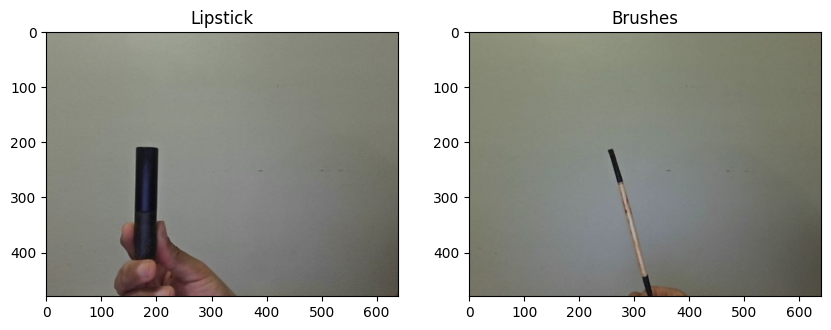

In [ ]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(lipstick_image)
plt.title('Lipstick')

plt.subplot(1, 2, 2)
plt.imshow(brushes_image)
plt.title('Brushes')


plt.show()

In [ ]:
import torch
import torch.nn as nn # all the relevant building blocks
import torch.nn.functional as F # functional interfaces for many operations
from torch.utils.data import Dataset, DataLoader # abstract primitives for handling data in pytorch
from torchvision import transforms

if torch.cuda.is_available():
    print("GPU is available")
    device = torch.device("cuda")
else:
    print("GPU is not available, using CPU instead")
    device = torch.device("cpu")

GPU is not available, using CPU instead


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import torchvision

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images_dir, augment=True):
        """
        Args:
            images_dir (string): Path to the directory with all the images.
            augment (bool, optional): Whether to augment the images produced by the dataset.
        """

        self.images_dir = images_dir
        self.images = []
        self.labels = []

        # Read images and labels
        for filename in os.listdir(images_dir):
            if filename.endswith('.jpg'):
                self.images.append(os.path.join(images_dir, filename))
                if 'lipstick' in filename:
                    self.labels.append(0)  # Label for lipstick
                elif 'brush' in filename:
                    self.labels.append(1)  # Label for brushes

        if augment:
            if augment:
              self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx]


        return image, label


In [ ]:
train_dataset = CustomDataset(images_dir="data/train", augment=True)
val_dataset = CustomDataset(images_dir="data/val", augment=False)

In [ ]:

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
len(train_loader), len(val_loader)

(3, 1)

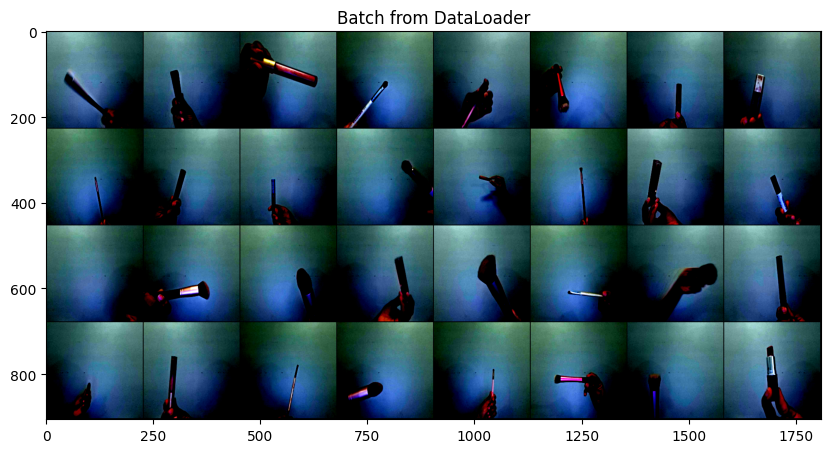

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots



def show_batch(loader):
    images, labels = next(iter(loader))
    grid = torchvision.utils.make_grid(images, nrow=8)
    plt.imshow(grid.permute(1, 2, 0))
    plt.title('Batch from DataLoader')
    plt.show()

show_batch(train_loader)


In [ ]:
class Simple2LayerCNN(nn.Module):
    def __init__(self):
        super(Simple2LayerCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc = None

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer + ReLU + MaxPooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer + ReLU + MaxPooling
        batch_size = x.size(0)
        x = x.view(batch_size, -1) # Flatten the tensor
        if self.fc is None:
            input_features = x.size(1)
            self.fc = nn.Linear(input_features, 2).to(x.device)
            print(f"Initialized fully connected layer with input size: {input_features}")

        x = self.fc(x)  # Fully connected layer


        return x

In [ ]:
simple_model = Simple2LayerCNN()
simple_model = simple_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_model.parameters(), lr=0.01)

In [ ]:
simple_model

Simple2LayerCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
def fit(model, train_loader, val_loader, n_epochs):
  history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

  for epoch in range(n_epochs):
    # initialise loss and acc for logging
    epoch_loss, val_epoch_loss = 0.0, 0.0
    epoch_acc, val_epoch_acc = 0.0, 0.0

    model.train()
    for images, labels in train_loader:

        images, labels = images.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()  # Reset gradients

        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights


        epoch_loss += loss.item()
        epoch_acc += torch.mean((torch.argmax(outputs.detach().cpu(), dim=1) == labels.cpu()).float())

    model.eval()
    with torch.inference_mode():
      for images, labels in val_loader:

          images, labels = images.to(device), labels.to(device)  # Move to device

          outputs = model(images)  # Forward pass
          loss = criterion(outputs, labels)





          val_epoch_loss += loss.item()
          val_epoch_acc += torch.mean((torch.argmax(outputs.detach().cpu(), dim=1) == labels.cpu()).float())

    history['loss'].append(epoch_loss/len(train_loader))
    history['accuracy'].append(epoch_acc/len(train_loader))

    history['val_loss'].append(val_epoch_loss/len(val_loader))
    history['val_accuracy'].append(val_epoch_acc/len(val_loader))

    print(f"Epoch {epoch + 1}, Loss: {history['loss'][-1]}, Val loss: {history['val_loss'][-1]}")

  return history

<font color='red'> Below is a function that we can use to visualise the learning progress. </font>

In [ ]:
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

In [ ]:
history = fit(simple_model, train_loader, val_loader, 20)

Initialized fully connected layer with input size: 25088
Epoch 1, Loss: 0.7093113462130228, Val loss: 0.6891422867774963
Epoch 2, Loss: 0.6858786145846049, Val loss: 0.6811429858207703
Epoch 3, Loss: 0.6707118153572083, Val loss: 0.6731998324394226
Epoch 4, Loss: 0.6706998745600382, Val loss: 0.6717630624771118
Epoch 5, Loss: 0.6176578998565674, Val loss: 0.6771355271339417
Epoch 6, Loss: 0.6004342436790466, Val loss: 0.6829854249954224
Epoch 7, Loss: 0.6576761802037557, Val loss: 0.6628040671348572
Epoch 8, Loss: 0.6630433797836304, Val loss: 0.6436219811439514
Epoch 9, Loss: 0.5938340028127035, Val loss: 0.6276088953018188
Epoch 10, Loss: 0.6138379772504171, Val loss: 0.6202911734580994
Epoch 11, Loss: 0.546169380346934, Val loss: 0.6137552261352539
Epoch 12, Loss: 0.5427352587381998, Val loss: 0.5981254577636719
Epoch 13, Loss: 0.4706971247990926, Val loss: 0.6242186427116394
Epoch 14, Loss: 0.4991482396920522, Val loss: 0.6501455307006836
Epoch 15, Loss: 0.5216263930002848, Val los

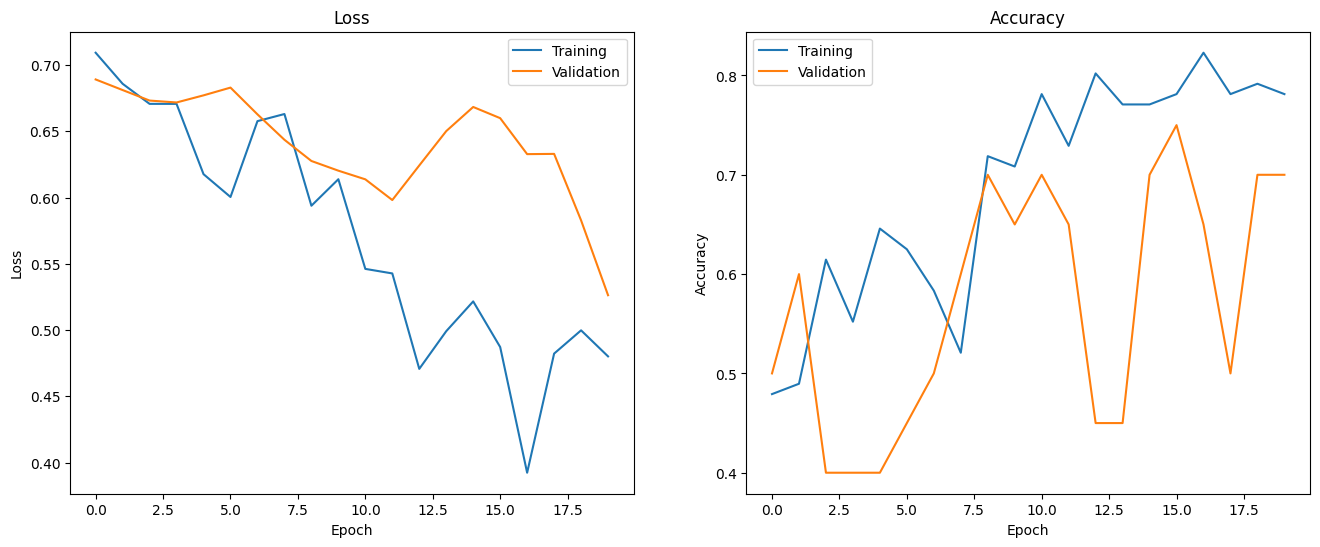

In [ ]:
plot_curves(history)

<font color='red'> Let's build a function for evaluating the trained model. </font>

In [ ]:
def predict(model, loader):
  model.eval()
  preds = []
  with torch.inference_mode():
    for images, labels in loader:
      images, labels = images.to(device), labels.to(device)
      # Forward pass
      outputs = model(images).detach().cpu().numpy()
      preds.extend(list(np.argmax(outputs, axis=1)))
  return np.array(preds)

In [ ]:
preds = predict(simple_model, val_loader)

np.mean(preds == val_dataset.labels)

0.7

In [ ]:

import torch
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [ ]:

history = fit(model, train_loader, val_loader, n_epochs=20)


Epoch 1, Loss: 0.5623282591501871, Val loss: 0.4792653024196625
Epoch 2, Loss: 0.17892688264449438, Val loss: 0.4552203118801117
Epoch 3, Loss: 0.08003588765859604, Val loss: 0.4704705774784088
Epoch 4, Loss: 0.03723558038473129, Val loss: 0.40365999937057495
Epoch 5, Loss: 0.05162813700735569, Val loss: 0.1979289948940277
Epoch 6, Loss: 0.010919457767158747, Val loss: 0.09678057581186295
Epoch 7, Loss: 0.01064622262492776, Val loss: 0.044376298785209656
Epoch 8, Loss: 0.004972555519392093, Val loss: 0.021092360839247704
Epoch 9, Loss: 0.004365453030914068, Val loss: 0.011811803095042706
Epoch 10, Loss: 0.01956341757128636, Val loss: 0.007130390964448452
Epoch 11, Loss: 0.001936466859964033, Val loss: 0.005297075491398573
Epoch 12, Loss: 0.004853994740794103, Val loss: 0.004214971326291561
Epoch 13, Loss: 0.0018611941680622597, Val loss: 0.0035289886873215437
Epoch 14, Loss: 0.0020544202028152845, Val loss: 0.003115773666650057
Epoch 15, Loss: 0.0009465479912857214, Val loss: 0.0030931

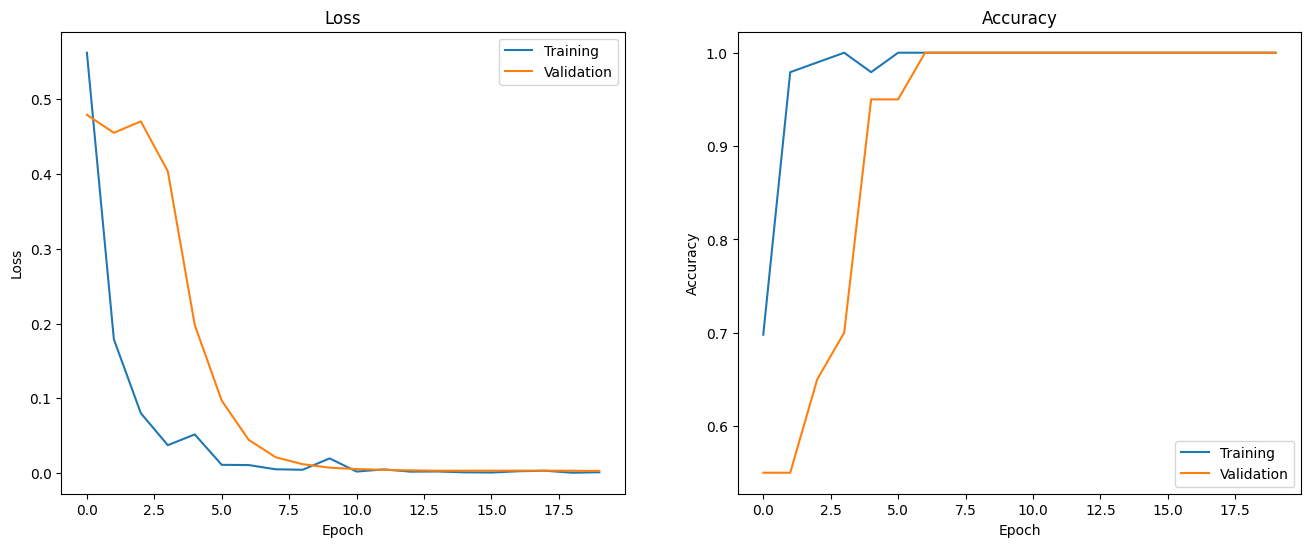

In [ ]:
plot_curves(history)

In [ ]:
preds = predict(model, val_loader)
np.mean(preds == val_dataset.labels)

1.0

Final accuracy is: 100%

In [ ]:
class YourCrazyCoolCNN(nn.Module):
    def __init__(self):
        super(YourCrazyCoolCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.3)

        self.fc1 = nn.Linear(128 * 9 * 9, 512 )
        self.fc2 = nn.Linear(512, 2)


    def forward(self, x):

        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [ ]:

model = YourCrazyCoolCNN().to(device)
history = fit(model, train_loader, val_loader, n_epochs=20)


Epoch 1, Loss: 0.7391716837882996, Val loss: 0.6927035450935364
Epoch 2, Loss: 0.682587742805481, Val loss: 0.6908778548240662
Epoch 3, Loss: 0.6975548466046652, Val loss: 0.6896575689315796
Epoch 4, Loss: 0.7243509292602539, Val loss: 0.688076913356781
Epoch 5, Loss: 0.7348731358846029, Val loss: 0.6861249208450317
Epoch 6, Loss: 0.7130285302797953, Val loss: 0.6846108436584473
Epoch 7, Loss: 0.7477514545122782, Val loss: 0.6819480061531067
Epoch 8, Loss: 0.7286116679509481, Val loss: 0.6792259812355042
Epoch 9, Loss: 0.7170472939809164, Val loss: 0.6761312484741211
Epoch 10, Loss: 0.7437741756439209, Val loss: 0.673733115196228
Epoch 11, Loss: 0.7158583203951517, Val loss: 0.6712517142295837
Epoch 12, Loss: 0.7116652925809225, Val loss: 0.6690502762794495
Epoch 13, Loss: 0.7099645733833313, Val loss: 0.6667792201042175
Epoch 14, Loss: 0.6906645099322001, Val loss: 0.6645423173904419
Epoch 15, Loss: 0.7198032935460409, Val loss: 0.6623881459236145
Epoch 16, Loss: 0.6720572511355082, V

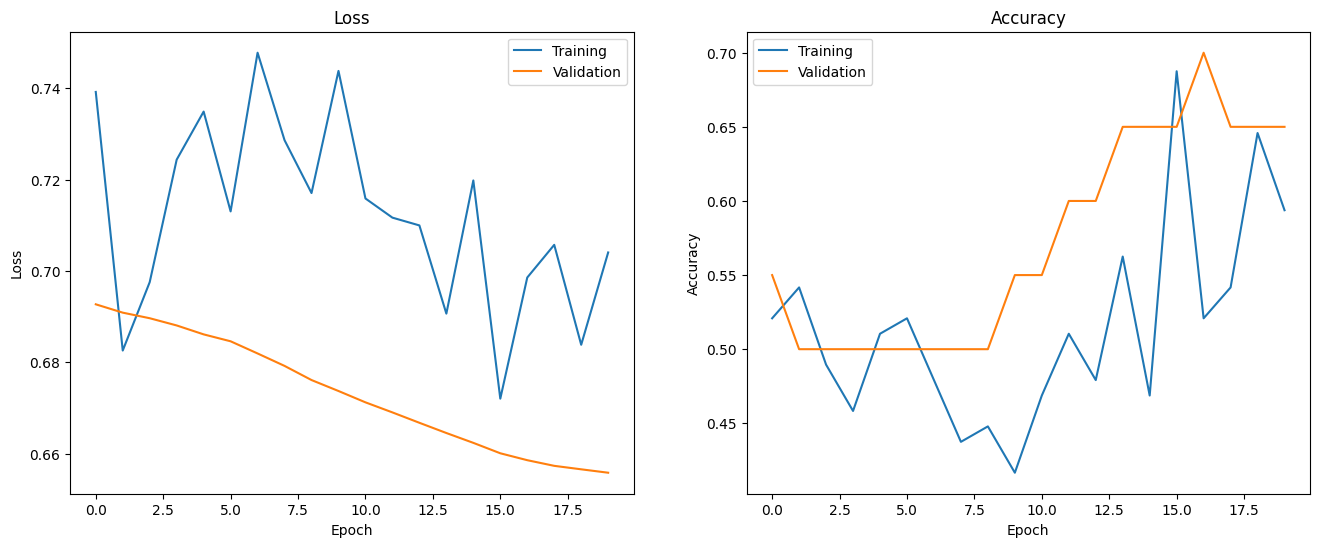

In [ ]:
plot_curves(history)

In [ ]:
preds = predict(model, val_loader)
np.mean(preds == val_dataset.labels)

0.65

In [ ]:

!pip install torch torchvision


In [ ]:
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/makeups'
print(os.listdir(dataset_path))

['20250310_014622.jpg', '20250310_014630.jpg', '20250310_014644.jpg', '20250310_014658.jpg', '20250310_014708.jpg', '20250310_014719.jpg', '20250310_014727.jpg', '20250310_014736.jpg', '20250310_014744.jpg', '20250310_014806.jpg', '20250310_014818.jpg', '20250310_014839.jpg', '20250310_014846.jpg', '20250310_014909.jpg', '20250310_014915.jpg', '20250310_014923.jpg', '20250310_014929.jpg', '20250310_014941.jpg', '20250310_014947.jpg', '20250310_014956.jpg', '20250310_015001.jpg', '20250310_015009.jpg', '20250310_015013.jpg', '20250310_015019.jpg', '20250310_015024.jpg', '20250310_015030.jpg', '20250310_015035.jpg', '20250310_015042.jpg', '20250310_015046.jpg', '20250310_015055.jpg', '20250310_015059.jpg', '20250310_015106.jpg', '20250310_015109.jpg', '20250310_015115.jpg', '20250310_015119.jpg', '20250310_015127.jpg', '20250310_015132.jpg', '20250310_015216.jpg', '20250310_015224.jpg', '20250310_015231.jpg', '20250310_015239.jpg', '20250310_015242.jpg', '20250310_015250.jpg', '20250310_

In [ ]:
class OODDataset(Dataset):
    def __init__(self, images_dir, augment=False):
        """
        Args:
            images_dir (string): Path to the directory with all the images.
            augment (bool, optional): Whether to augment the images produced by the dataset.
        """
        self.images_dir = images_dir
        self.images = [os.path.join(images_dir, filename) for filename in os.listdir(images_dir) if filename.endswith('.jpg')]

        # For the OOD dataset, no labels
        self.labels = [0] * len(self.images)

        if augment:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx]  # We return dummy labels

        return image, label


In [ ]:
ood_dataset = OODDataset(images_dir=dataset_path, augment=False)
ood_loader = DataLoader(ood_dataset, batch_size=32, shuffle=False)
evaluate_on_ood(simple_model, ood_loader)



OOD Loss: 0.45130130648612976
OOD Accuracy: 0.8515625


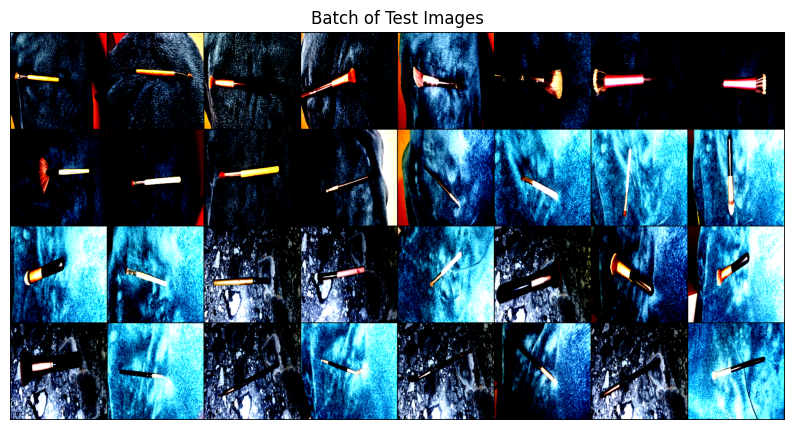

In [ ]:

def visualize_batch(loader):
    images, labels = next(iter(loader))
    grid = torchvision.utils.make_grid(images, nrow=8)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title('Batch of Test Images')
    plt.axis('off')
    plt.show()

# Visualize a batch of images from the dataset
visualize_batch(ood_loader)



In [ ]:

def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    criterion = nn.CrossEntropyLoss()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Define your models
models = [simple_model, model]
model_names = ["Simple2LayerCNN", "Model"]

# Evaluate each model and report accuracy
for model, name in zip(models, model_names):
    accuracy = evaluate_model(model, ood_loader)
    print(f"Accuracy of {name} on OOD test set: {accuracy:.2f}%")



Accuracy of Simple2LayerCNN on OOD test set: 81.19%
Accuracy of Model on OOD test set: 37.62%
